In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [45]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "memory_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "memory_labels_df.pkl"))

In [46]:
features_df.head()

,Gaze_Counts_In_RoI_Pre,Gaze_Counts_In_RoI_Post,Gaze_Counts_Out_RoI_Pre,Gaze_Counts_Out_RoI_Post,Gaze_In\out_RoI_Ratio_Pre,Gaze_In\out_RoI_Ratio_Post,Gaze_Re_Entries_To_RoI_Count_Pre,Gaze_Re_Entries_To_RoI_Count_Post,Gaze_Re_Entries_To_RoI_Rate_Pre,Gaze_Re_Entries_To_RoI_Rate_Post,...,DVA_Max_Gaze_Post,DVA_Min_Gaze_Post,DVA_Mean_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Mean_Fixations_Post,DVA_Std_Fixations_Post,DVA_Max_Fixations_Post,DVA_Min_Fixations_Post
0,0,779,2747,1445,0.000000,0.539100,0,1,0.000000,0.285714,...,33.178480,2.585135,24.921363,5.574038,31.839663,13.699264,17.421185,10.286085,28.243839,3.746346
1,2794,1772,1686,0,1.657177,1772.000000,3,0,0.334896,0.000000,...,3.090729,1.447549,7.509422,7.160292,18.108982,0.901646,2.408315,0.492971,2.968488,1.774964
2,0,180,2793,2175,0.000000,0.082759,0,1,0.000000,0.269639,...,31.482871,5.488468,25.109906,4.940303,31.112558,16.151324,18.737548,8.010507,31.315954,6.633146
3,0,177,3210,1532,0.000000,0.115535,0,2,0.000000,0.827586,...,32.261172,3.043144,21.353234,6.725093,30.694673,12.165579,21.467756,8.684141,31.062599,5.117863
4,546,866,3950,2426,0.138228,0.356966,4,2,0.442429,0.358166,...,29.542618,2.776314,19.043102,7.511875,31.235682,5.007064,18.376179,7.071288,29.432959,3.413765


In [47]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 116 entries, Gaze_Counts_In_RoI_Pre to DVA_Min_Fixations_Post
dtypes: float64(107), int32(9)
memory usage: 679.6 KB


In [48]:
labels_df.head()

,mem
series_id,
0,0
1,1
2,1
3,1
4,0


In [49]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 779
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mem     780 non-null    int64
dtypes: int64(1)
memory usage: 12.2 KB


Data Cleaning

how many missing values are there in each column? show the top 10

In [50]:
features_df.isna().sum(axis=0).sort_values(ascending=False).head(10)

Pupil radius_Fixations_First_Diff_Pre            182
Pupil radius_Fixations_First_Diff_Post           182
Pupil radius_Fixations_ReEntry_Mean_Diff_Pre     182
Pupil radius_Fixations_ReEntry_Mean_Diff_Post    182
onset_Std_Saccades_Start_In_RoI_Post             129
Duration_Max_Saccades_Start_In_RoI_Pre           129
onset_Max_Saccades_Start_In_RoI_Pre              129
vis_angle_Max_Saccades_Start_In_RoI_Pre          129
peak_velocity_Max_Saccades_Start_In_RoI_Pre      129
onset_Min_Saccades_Start_In_RoI_Pre              129
dtype: int64

Remove columns with more than 30% missing values

In [51]:
features_df = features_df.loc[:, features_df.isna().sum(axis=0) < 0.3 * features_df.shape[0]]

In [52]:
features_df.isna().sum(axis=0).sort_values(ascending=False).head(10)

Pupil radius_Fixations_First_Diff_Pre            182
Pupil radius_Fixations_First_Diff_Post           182
Pupil radius_Fixations_ReEntry_Mean_Diff_Pre     182
Pupil radius_Fixations_ReEntry_Mean_Diff_Post    182
onset_Std_Saccades_Start_In_RoI_Post             129
Duration_Max_Saccades_Start_In_RoI_Pre           129
onset_Max_Saccades_Start_In_RoI_Pre              129
vis_angle_Max_Saccades_Start_In_RoI_Pre          129
peak_velocity_Max_Saccades_Start_In_RoI_Pre      129
onset_Min_Saccades_Start_In_RoI_Pre              129
dtype: int64

how many missing values are there in each row? show the top 10

In [53]:
features_df.isna().sum(axis=1).sort_values(ascending=False).head(10)

223    69
549    69
707    68
250    68
251    68
110    68
695    68
591    68
580    68
103    68
dtype: int64

Remove rows with more than 50% missing values

In [54]:
features_df = features_df.loc[features_df.isna().sum(axis=1) < 0.5 * features_df.shape[1], :]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [55]:
features_df.isna().sum(axis=1).sort_values(ascending=False).head(10)

196    52
489    48
680    48
540    48
170    48
253    40
137    40
661    40
778    40
124    40
dtype: int64

Train/Test Split (before any preprocessing is done)

In [56]:
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "memory_series_id_df.pkl"))

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Shuffle the list of subject IDs randomly
random = np.random
random.seed(1)
random.shuffle(subject_ids)

# Split the list of subject IDs into two parts
train_subject_ids = subject_ids[:int(len(subject_ids)*0.9)]
test_subject_ids = subject_ids[int(len(subject_ids)*0.9):]

# Subset the data based on the split list of subject IDs
train_data = series_id_df[series_id_df[config.SUBJECT].isin(train_subject_ids)]
test_data = series_id_df[series_id_df[config.SUBJECT].isin(test_subject_ids)]

X_train = features_df[features_df.index.isin(train_data.index)]
X_test = features_df[features_df.index.isin(test_data.index)]
y_train = labels_df[labels_df.index.isin(train_data.index)]
y_test = labels_df[labels_df.index.isin(test_data.index)]

In [57]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(features_df,
#                                                     labels_df['mem'],
#                                                     random_state=420,
#                                                     test_size=0.2)

In [58]:
X_train.head()

,Gaze_Counts_In_RoI_Pre,Gaze_Counts_In_RoI_Post,Gaze_Counts_Out_RoI_Pre,Gaze_Counts_Out_RoI_Post,Gaze_In\out_RoI_Ratio_Pre,Gaze_In\out_RoI_Ratio_Post,Gaze_Re_Entries_To_RoI_Count_Pre,Gaze_Re_Entries_To_RoI_Count_Post,Gaze_Re_Entries_To_RoI_Rate_Pre,Gaze_Re_Entries_To_RoI_Rate_Post,...,DVA_Max_Gaze_Post,DVA_Min_Gaze_Post,DVA_Mean_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Mean_Fixations_Post,DVA_Std_Fixations_Post,DVA_Max_Fixations_Post,DVA_Min_Fixations_Post
0,0,779,2747,1445,0.000000,0.539100,0,1,0.000000,0.285714,...,33.178480,2.585135,24.921363,5.574038,31.839663,13.699264,17.421185,10.286085,28.243839,3.746346
1,2794,1772,1686,0,1.657177,1772.000000,3,0,0.334896,0.000000,...,3.090729,1.447549,7.509422,7.160292,18.108982,0.901646,2.408315,0.492971,2.968488,1.774964
2,0,180,2793,2175,0.000000,0.082759,0,1,0.000000,0.269639,...,31.482871,5.488468,25.109906,4.940303,31.112558,16.151324,18.737548,8.010507,31.315954,6.633146
3,0,177,3210,1532,0.000000,0.115535,0,2,0.000000,0.827586,...,32.261172,3.043144,21.353234,6.725093,30.694673,12.165579,21.467756,8.684141,31.062599,5.117863
4,546,866,3950,2426,0.138228,0.356966,4,2,0.442429,0.358166,...,29.542618,2.776314,19.043102,7.511875,31.235682,5.007064,18.376179,7.071288,29.432959,3.413765


Fill missing values with the mean of the column

In [59]:
X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
X_test = X_test.fillna(X_train.mean())

Balancing the dataset

In [60]:
y_train.value_counts()

mem
1      476
0      107
dtype: int64

SMOTE

In [61]:
# from imblearn.over_sampling import SMOTE
#
# sm = SMOTE(random_state=420)
# X_train, y_train = sm.fit_resample(X_train, y_train)

Random Oversampling

In [62]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=420)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [63]:
y_train.value_counts()

mem
0      476
1      476
dtype: int64

Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

# Create separate StandardScaler instances
scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# scaler_y.fit(y_train.values.reshape(-1, 1))

# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
X_test_scaled = scaler_x.transform(X_test.values)
y_train = y_train.values.reshape(-1, 1).flatten()
y_test = y_test.values.reshape(-1, 1).flatten()

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

PCA

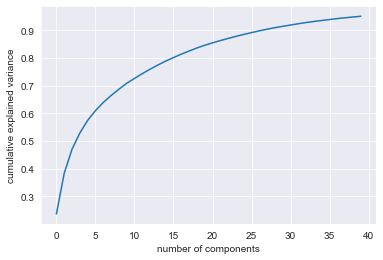

In [65]:
pca = PCA(n_components=0.95).fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [66]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [67]:
X_train_pca

array([[-7.18182495, -1.27781697, -0.78904225, ...,  0.08201737,
        -0.17094378,  0.15962482],
       [12.02109748, -2.28543804, -5.67905323, ...,  0.33249173,
        -0.80148671,  0.03574344],
       [-8.30404683,  0.08407432, -0.51028584, ...,  0.18116089,
         0.36035724, -0.24377761],
       ...,
       [-2.7998777 ,  9.99052134, -3.76107629, ..., -0.79240789,
        -0.10364857,  0.28776581],
       [ 4.64955977,  1.62058135,  1.42878301, ...,  0.0662411 ,
        -0.01759738, -0.52774096],
       [-1.97062188,  5.80292505, -3.65488473, ..., -0.39569161,
        -0.42400444,  0.23804442]])

LDA

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

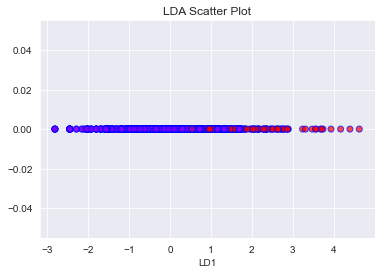

In [69]:
# Create a scatter plot of the transformed data
plt.scatter(X_train_lda, np.zeros(len(X_train_lda)), c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.xlabel('LD1')
plt.title('LDA Scatter Plot')
plt.show()

In [70]:
X_train_preprocessed = X_train_scaled
X_test_preprocessed = X_test_scaled

Classification models

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()

In [72]:
from sklearn.model_selection import GridSearchCV

Logistic Regression model

In [73]:
from sklearn.linear_model import LogisticRegression

# Define the range of values for each hyperparameter
C = np.linspace(0.01, 1, 15)
PENALTY = ['l1', 'l2']
SOLVER = ['liblinear', 'saga']

PARAM_GRID  = {
    'C': C,
    'penalty': PENALTY,
    'solver': SOLVER
}

# Create the logistic regression estimator
estimator = LogisticRegression(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

{'C': 0.505, 'penalty': 'l2', 'solver': 'saga'}

Logistic Regression (test data)
Accuracy: 0.55
Precision: 0.75
Recall: 0.59
F1-score: 0.66
ROC-AUC score: 0.52


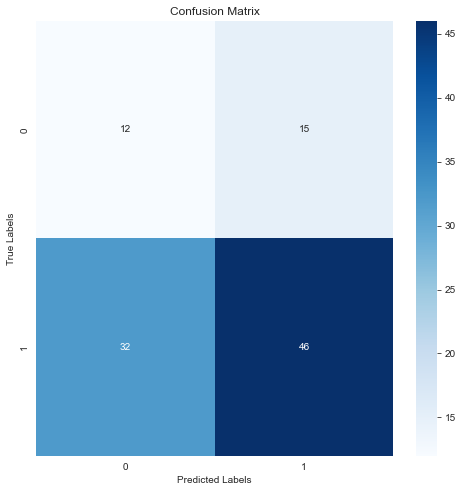

In [74]:
# Get the best estimator
log_reg_best_estimator = model_searcher.best_estimator_
y_test_pred = log_reg_best_estimator.predict(X_test_preprocessed)

evaluate_model("Logistic Regression (test data)", y_test, y_test_pred)

Gradient Boosting model

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.01, 0.5, 10)
MAX_DEPTH = range(2, 5)
N_ESTIMATORS = range(100, 180, 15)


PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the gradient boosting estimator
estimator = GradientBoostingClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.11888888888888888, 'max_depth': 4, 'n_estimators': 175}

Gradient Boosting (test data)
Accuracy: 0.68
Precision: 0.73
Recall: 0.88
F1-score: 0.8
ROC-AUC score: 0.48


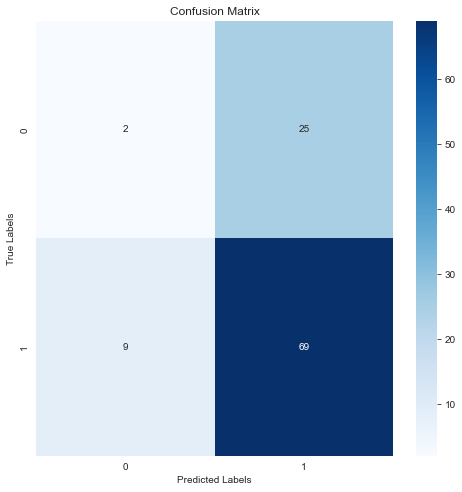

In [76]:
# Get the best estimator
gb_best_estimator = model_searcher.best_estimator_
y_test_pred = gb_best_estimator.predict(X_test_preprocessed)

evaluate_model("Gradient Boosting (test data)", y_test, y_test_pred)

Random Forest model

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Define the range of values for each hyperparameter
N_ESTIMATORS = range(50, 140, 15)
MAX_DEPTH = range(2, 5)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 4)

PARAM_GRID  = {
    'n_estimators': N_ESTIMATORS,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the random forest estimator
estimator = RandomForestClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 125}

Random Forest (test data)
Accuracy: 0.53
Precision: 0.69
Recall: 0.67
F1-score: 0.68
ROC-AUC score: 0.41


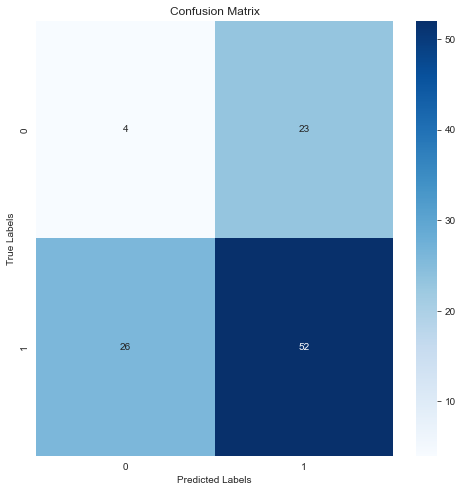

In [78]:
rf_best_estimator = model_searcher.best_estimator_
y_test_pred = rf_best_estimator.predict(X_test_preprocessed)

evaluate_model("Random Forest (test data)", y_test, y_test_pred)

XGBoost model

In [79]:
from xgboost import XGBClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.05, 0.5, 10)
MAX_DEPTH = range(1, 5)
N_ESTIMATORS = range(70, 150, 15)

PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the XGBoost estimator
estimator = XGBClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 100}

Evaluate the best model on the test data

XGBoost (test data)
Accuracy: 0.64
Precision: 0.72
Recall: 0.85
F1-score: 0.78
ROC-AUC score: 0.44


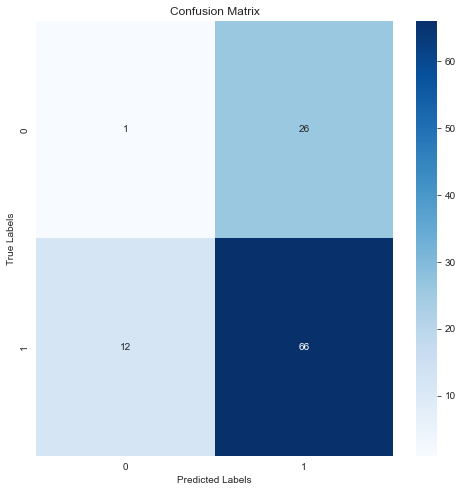

In [80]:
xgb_best_estimator = model_searcher.best_estimator_
y_test_pred = xgb_best_estimator.predict(X_test_preprocessed)

evaluate_model("XGBoost (test data)", y_test, y_test_pred)

TabNetClassifier with automatic hyperparameters tuning

In [81]:
!pip install pytorch-tabnet
!pip install optuna

In [82]:
# Convert Pandas DataFrame to NumPy array
X_train_np = X_train_preprocessed.values
X_test_np = X_test_preprocessed.values

In [83]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna
from sklearn.metrics import mean_squared_error

# Define objective function for optuna
def objective(trial):
    # Generate hyperparameter search space
    params = {
        'n_d': trial.suggest_int('n_d', 8, 64),
        'n_a': trial.suggest_int('n_a', 8, 64),
        'n_steps': trial.suggest_int('n_steps', 1, 19),
        'gamma': trial.suggest_float('gamma', 0.1, 2.0),
        'n_independent': trial.suggest_int('n_independent', 1, 10),
        'n_shared': trial.suggest_int('n_shared', 1, 10),
        'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
        # 'optimizer_fn': torch.optim.Adam,
        # 'optimizer_params': dict(lr=2e-2, weight_decay=1e-5),
        # 'mask_type': 'entmax',
        # 'scheduler_params': dict(mode="min", patience=5, min_lr=1e-5, factor=0.9,),
        # 'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
        'verbose': 0
    }

    # Create TabNetClassifier object with hyperparameters from optuna
    classifier = TabNetClassifier(**params)

    # Train and evaluate the model
    classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
    val_preds = classifier.predict_proba(X_test_np)[:, 1]
    val_auc = roc_auc_score(y_test, val_preds)

    return val_auc

# Create optuna study
study = optuna.create_study(direction='maximize')

# Optimize hyperparameters using optuna
study.optimize(objective, n_trials=42, timeout=600)

# Get best hyperparameters from optuna
best_params = study.best_trial.params

# Train final model with best hyperparameters
tabnet = TabNetClassifier(**best_params)
tabnet.fit(X_train_np, y_train)
best_params

[I 2023-06-11 15:47:23,916] A new study created in memory with name: no-name-99c977d7-54a9-4e8c-89f5-81b437e46f99



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.49573


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:25,726] Trial 0 finished with value: 0.49572649572649574 and parameters: {'n_d': 35, 'n_a': 19, 'n_steps': 12, 'gamma': 0.8660743742398707, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.07921628192826567}. Best is trial 0 with value: 0.49572649572649574.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50119


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:28,107] Trial 1 finished with value: 0.5011870845204179 and parameters: {'n_d': 51, 'n_a': 34, 'n_steps': 15, 'gamma': 0.38811153443441704, 'n_independent': 8, 'n_shared': 7, 'lambda_sparse': 0.08834441382072497}. Best is trial 1 with value: 0.5011870845204179.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51971


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:29,985] Trial 2 finished with value: 0.5197056030389363 and parameters: {'n_d': 60, 'n_a': 42, 'n_steps': 19, 'gamma': 1.9799203969615644, 'n_independent': 1, 'n_shared': 8, 'lambda_sparse': 0.009653100274016793}. Best is trial 2 with value: 0.5197056030389363.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.56268


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:31,191] Trial 3 finished with value: 0.5626780626780626 and parameters: {'n_d': 10, 'n_a': 47, 'n_steps': 8, 'gamma': 0.2586656188527093, 'n_independent': 10, 'n_shared': 6, 'lambda_sparse': 0.07866854836425141}. Best is trial 3 with value: 0.5626780626780626.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:33,403] Trial 4 finished with value: 0.5 and parameters: {'n_d': 34, 'n_a': 56, 'n_steps': 16, 'gamma': 1.0683835921002693, 'n_independent': 4, 'n_shared': 8, 'lambda_sparse': 0.07047495358957456}. Best is trial 3 with value: 0.5626780626780626.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.46083


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:35,250] Trial 5 finished with value: 0.46082621082621084 and parameters: {'n_d': 42, 'n_a': 37, 'n_steps': 14, 'gamma': 1.5991335170031966, 'n_independent': 7, 'n_shared': 6, 'lambda_sparse': 0.0039745992681528355}. Best is trial 3 with value: 0.5626780626780626.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.42165


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:37,667] Trial 6 finished with value: 0.42165242165242167 and parameters: {'n_d': 52, 'n_a': 40, 'n_steps': 18, 'gamma': 0.48331844616282127, 'n_independent': 3, 'n_shared': 10, 'lambda_sparse': 0.010384037086846714}. Best is trial 3 with value: 0.5626780626780626.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52137


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:39,775] Trial 7 finished with value: 0.5213675213675213 and parameters: {'n_d': 57, 'n_a': 18, 'n_steps': 15, 'gamma': 1.9635563765798008, 'n_independent': 9, 'n_shared': 5, 'lambda_sparse': 0.00040252628800094606}. Best is trial 3 with value: 0.5626780626780626.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:40,214] Trial 8 finished with value: 0.5094966761633428 and parameters: {'n_d': 42, 'n_a': 16, 'n_steps': 4, 'gamma': 1.382400061500249, 'n_independent': 1, 'n_shared': 10, 'lambda_sparse': 0.078013171159396}. Best is trial 3 with value: 0.5626780626780626.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5095

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.45157


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:42,548] Trial 9 finished with value: 0.4515669515669516 and parameters: {'n_d': 34, 'n_a': 16, 'n_steps': 16, 'gamma': 1.477698298601129, 'n_independent': 9, 'n_shared': 8, 'lambda_sparse': 0.030449708798407193}. Best is trial 3 with value: 0.5626780626780626.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:43,318] Trial 10 finished with value: 0.4589268755935422 and parameters: {'n_d': 8, 'n_a': 62, 'n_steps': 7, 'gamma': 0.32973425791779487, 'n_independent': 10, 'n_shared': 1, 'lambda_sparse': 0.09964614599997443}. Best is trial 3 with value: 0.5626780626780626.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.45893


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:44,136] Trial 11 finished with value: 0.5 and parameters: {'n_d': 8, 'n_a': 27, 'n_steps': 8, 'gamma': 0.7327886792211717, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.053673247381648706}. Best is trial 3 with value: 0.5626780626780626.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50641


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:45,273] Trial 12 finished with value: 0.5064102564102565 and parameters: {'n_d': 21, 'n_a': 49, 'n_steps': 10, 'gamma': 0.11853551481380678, 'n_independent': 8, 'n_shared': 4, 'lambda_sparse': 0.05240420881175596}. Best is trial 3 with value: 0.5626780626780626.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:45,586] Trial 13 finished with value: 0.5724121557454891 and parameters: {'n_d': 21, 'n_a': 9, 'n_steps': 2, 'gamma': 1.1508929457380626, 'n_independent': 10, 'n_shared': 4, 'lambda_sparse': 0.028710678872411834}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.57241


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:45,735] Trial 14 finished with value: 0.44990503323836656 and parameters: {'n_d': 20, 'n_a': 9, 'n_steps': 1, 'gamma': 1.0219028001223849, 'n_independent': 6, 'n_shared': 2, 'lambda_sparse': 0.03432697873626183}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.44991


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:46,015] Trial 15 finished with value: 0.3803418803418803 and parameters: {'n_d': 17, 'n_a': 52, 'n_steps': 1, 'gamma': 0.619708744583284, 'n_independent': 10, 'n_shared': 3, 'lambda_sparse': 0.06253903970653547}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.38034


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:46,503] Trial 16 finished with value: 0.5002374169040835 and parameters: {'n_d': 27, 'n_a': 28, 'n_steps': 5, 'gamma': 1.1787139842198462, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.04038158822787163}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50024


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:47,001] Trial 17 finished with value: 0.47483380816714144 and parameters: {'n_d': 14, 'n_a': 43, 'n_steps': 4, 'gamma': 0.7738276487923117, 'n_independent': 8, 'n_shared': 4, 'lambda_sparse': 0.023589230780018816}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47483

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47365


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:48,568] Trial 18 finished with value: 0.47364672364672367 and parameters: {'n_d': 25, 'n_a': 64, 'n_steps': 10, 'gamma': 0.2079142930544588, 'n_independent': 9, 'n_shared': 5, 'lambda_sparse': 0.042349263430790256}. Best is trial 13 with value: 0.5724121557454891.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:49,043] Trial 19 finished with value: 0.43637226970560306 and parameters: {'n_d': 13, 'n_a': 8, 'n_steps': 7, 'gamma': 0.5591631640429441, 'n_independent': 7, 'n_shared': 2, 'lambda_sparse': 0.05749269184175249}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.43637


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:49,459] Trial 20 finished with value: 0.5486704653371319 and parameters: {'n_d': 27, 'n_a': 29, 'n_steps': 3, 'gamma': 0.2874088870258181, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.04344999638871807}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.54867


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:49,857] Trial 21 finished with value: 0.5144824311490979 and parameters: {'n_d': 27, 'n_a': 29, 'n_steps': 3, 'gamma': 0.2736283284305019, 'n_independent': 5, 'n_shared': 7, 'lambda_sparse': 0.04323969028075437}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51448


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:50,269] Trial 22 finished with value: 0.5007122507122507 and parameters: {'n_d': 24, 'n_a': 23, 'n_steps': 2, 'gamma': 0.13654978075765994, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.06356647753328307}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50071


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:50,927] Trial 23 finished with value: 0.5263532763532763 and parameters: {'n_d': 30, 'n_a': 47, 'n_steps': 5, 'gamma': 0.4851294346217292, 'n_independent': 5, 'n_shared': 6, 'lambda_sparse': 0.05143344808681914}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52635


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:51,606] Trial 24 finished with value: 0.5097340930674265 and parameters: {'n_d': 15, 'n_a': 33, 'n_steps': 6, 'gamma': 0.3616227946087655, 'n_independent': 7, 'n_shared': 5, 'lambda_sparse': 0.027562656432692588}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50973

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53704


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:53,339] Trial 25 finished with value: 0.537037037037037 and parameters: {'n_d': 19, 'n_a': 55, 'n_steps': 9, 'gamma': 0.10735995356184544, 'n_independent': 9, 'n_shared': 9, 'lambda_sparse': 0.021514805238800623}. Best is trial 13 with value: 0.5724121557454891.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:53,965] Trial 26 finished with value: 0.39316239316239315 and parameters: {'n_d': 12, 'n_a': 13, 'n_steps': 12, 'gamma': 0.6720269608227458, 'n_independent': 3, 'n_shared': 3, 'lambda_sparse': 0.03761830964267045}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.39316


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:54,535] Trial 27 finished with value: 0.3675213675213675 and parameters: {'n_d': 30, 'n_a': 23, 'n_steps': 3, 'gamma': 0.4667269082448115, 'n_independent': 10, 'n_shared': 7, 'lambda_sparse': 0.04667399190571851}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.36752


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:54,888] Trial 28 finished with value: 0.4703228869895536 and parameters: {'n_d': 42, 'n_a': 47, 'n_steps': 2, 'gamma': 0.2649963867634327, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.04839516734965639}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47032

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47721


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:56,398] Trial 29 finished with value: 0.47720797720797725 and parameters: {'n_d': 38, 'n_a': 23, 'n_steps': 11, 'gamma': 0.9346805683537087, 'n_independent': 6, 'n_shared': 9, 'lambda_sparse': 0.03257895481629582}. Best is trial 13 with value: 0.5724121557454891.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:56,949] Trial 30 finished with value: 0.5042735042735043 and parameters: {'n_d': 22, 'n_a': 38, 'n_steps': 6, 'gamma': 0.8381795871017452, 'n_independent': 6, 'n_shared': 3, 'lambda_sparse': 0.06717841208577022}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50427

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.48291


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:47:58,766] Trial 31 finished with value: 0.48290598290598286 and parameters: {'n_d': 18, 'n_a': 54, 'n_steps': 9, 'gamma': 0.1359263902292316, 'n_independent': 9, 'n_shared': 9, 'lambda_sparse': 0.02141504216480726}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51282


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:48:00,391] Trial 32 finished with value: 0.5128205128205128 and parameters: {'n_d': 11, 'n_a': 58, 'n_steps': 8, 'gamma': 0.3854924979769754, 'n_independent': 10, 'n_shared': 9, 'lambda_sparse': 0.025987309117990805}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.46201


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:48:02,259] Trial 33 finished with value: 0.46201329534662866 and parameters: {'n_d': 17, 'n_a': 44, 'n_steps': 13, 'gamma': 0.25810863952283514, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.016666007952588102}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53348


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:48:03,743] Trial 34 finished with value: 0.5334757834757835 and parameters: {'n_d': 30, 'n_a': 59, 'n_steps': 9, 'gamma': 0.5726313088545505, 'n_independent': 9, 'n_shared': 5, 'lambda_sparse': 0.03653707818048823}. Best is trial 13 with value: 0.5724121557454891.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:48:04,286] Trial 35 finished with value: 0.47578347578347574 and parameters: {'n_d': 19, 'n_a': 33, 'n_steps': 3, 'gamma': 0.21415135185551576, 'n_independent': 8, 'n_shared': 8, 'lambda_sparse': 0.020293061666191006}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47578

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.44801


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:48:05,290] Trial 36 finished with value: 0.448005698005698 and parameters: {'n_d': 23, 'n_a': 51, 'n_steps': 5, 'gamma': 0.42279746543535257, 'n_independent': 10, 'n_shared': 7, 'lambda_sparse': 0.015626544680220844}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.49929


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:48:07,503] Trial 37 finished with value: 0.4992877492877493 and parameters: {'n_d': 10, 'n_a': 56, 'n_steps': 11, 'gamma': 0.12606070624439902, 'n_independent': 9, 'n_shared': 9, 'lambda_sparse': 0.029100183627113557}. Best is trial 13 with value: 0.5724121557454891.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:48:08,257] Trial 38 finished with value: 0.5075973409306743 and parameters: {'n_d': 15, 'n_a': 40, 'n_steps': 7, 'gamma': 0.3841910545807301, 'n_independent': 2, 'n_shared': 10, 'lambda_sparse': 0.07705584232463694}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5076


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:48:08,543] Trial 39 finished with value: 0.4477682811016145 and parameters: {'n_d': 33, 'n_a': 12, 'n_steps': 2, 'gamma': 0.529532711609582, 'n_independent': 5, 'n_shared': 6, 'lambda_sparse': 0.08510350120498615}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.44777

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52066


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:48:11,938] Trial 40 finished with value: 0.5206552706552706 and parameters: {'n_d': 62, 'n_a': 35, 'n_steps': 19, 'gamma': 0.6727185940034693, 'n_independent': 7, 'n_shared': 8, 'lambda_sparse': 0.03349851654614805}. Best is trial 13 with value: 0.5724121557454891.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47293


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:48:13,487] Trial 41 finished with value: 0.47293447293447294 and parameters: {'n_d': 30, 'n_a': 60, 'n_steps': 9, 'gamma': 0.2881629592253002, 'n_independent': 9, 'n_shared': 5, 'lambda_sparse': 0.03838326136154388}. Best is trial 13 with value: 0.5724121557454891.


epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
epoch 21 | loss: 0.0     |  0:00:00s
epoch 22 | loss: 0.0     |  0:00:00s
epoch 23 | loss: 0.0     |  0:00:00s
epoch 24 | loss: 0.0     |  0:00:00s
epoch 25 | loss: 0.0     |  0:00:00s
epoch 26 | loss: 0.0     |  0:00:00s
e

C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


{'n_d': 21,
 'n_a': 9,
 'n_steps': 2,
 'gamma': 1.1508929457380626,
 'n_independent': 10,
 'n_shared': 4,
 'lambda_sparse': 0.028710678872411834}

Evaluate the best model on the test data

Tabnet (test data)
Accuracy: 0.6
Precision: 0.77
Recall: 0.65
F1-score: 0.71
ROC-AUC score: 0.55


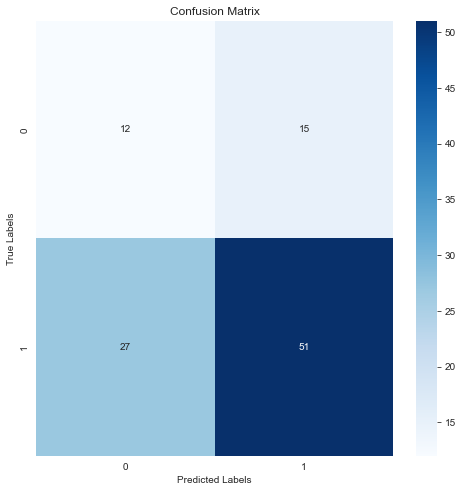

In [84]:
# Evaluate final model on test set
y_test_pred = tabnet.predict(X_test_np)
evaluate_model("Tabnet (test data)", y_test, y_test_pred)

The best model is Gradient Boosting

In [87]:
the_best_model_ever = tabnet

Feature importance

In [86]:
feature_importances = pd.DataFrame(the_best_model_ever.feature_importances_,
                                   index = X_train_preprocessed.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Fixations_Re_Entries_To_RoI_Count_Pre,7.262243e-02
onset_Std_Fixations_In_RoI_Pre,7.042355e-02
Pupil radius_Fixations_ReEntry_Mean_Diff_Post,6.859474e-02
peak_velocity_Min_Saccades_End_In_RoI_Post,6.424440e-02
Saccades_End_In\out_RoI_Ratio_Pre,4.321473e-02
...,...
DVA_Max_Gaze_Post,8.888818e-09
Duration_Fixations_First_In_RoI_Post,8.733947e-09
Duration_Max_Saccades_End_In_RoI_Post,7.725742e-09
onset_Mean_Saccades_Start_In_RoI_Post,7.653643e-09
